<h1>Определение успешности компьютерной игры</h1>
<h2>Открытие файла с данными и изучение общей информации</h2>

In [49]:
import pandas as pd
import numpy as np
from scipy import stats as st
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/datasets/games.csv')

In [2]:
df.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [5]:
df.duplicated().sum()

0

<b>Вывод:</b> предварительно изучив данные, мы можем сказать, что в них имеются некоторые проблемы: есть пропуски данных в некоторых столбцах, к значениям некоторых столбцов некорректно применен тип данных, также есть одно некорретные для pep-8 названия столбцов; явные дубликаты в таблице отсутствуют. Предобработку данных пройдем в следующем шаге.

<h2>Подготовка данных</h2>

<b>Заменим названия столбцов</b>, привяди их к нижнему регистру:

In [6]:
df.columns = [i.lower() for i in df.columns]
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

<b>Преобразуем данные в нужные типы</b>

Года в столбце 'year_of_release' записаны числом с плавающей точкой. Необходимо привести этот столбец к целочисленному типу int. 

In [7]:
df['year_of_release'] = df['year_of_release'].astype('Int64')

Также столбец 'user_score' должен быть приведен к типу float. Посмотрим на него подробнее.

In [8]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В столбце есть значение "tbd", из-за пока остается невозможным преобразовать данный столбец к нужному типу. Поэтому для начала обработаем в нем пропуски (в плане по проекту этот шаг идет следующим, но без него не удасться выполнить текущий). Значение tbd обозначает, что данные только предстоит определить, но сейчас это всего лишь пропуск, который можно заменить на nan:

In [9]:
df['user_score'] = df['user_score'].replace('tbd', np.nan)
df['user_score'] = df['user_score'].astype(float)

In [10]:
df['user_score'].unique() #проверим, ушли ли значения tbd

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

<b>Обработаем пропуски</b>

In [11]:
df.info() #продублируем информацию о таблице

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


В столбце 'name' присутсвут два пропуска. Придется удалить эти 2 строки, так как заполнить мы их не сможем и их удаление не скажется на дальнейшем анализе.

In [12]:
df.dropna(subset=['name'], inplace=True)

В столбце с годом выпуска игры 'year_of_release' также присутсвуют пропуски. Заполнить мы их ничем не можем. Их доля относительно общего количества данных мала, поэтому мы можем удалить строки с пропусками в этом столбце:

In [13]:
df.dropna(subset=['year_of_release'], inplace=True)

Поступим так же со столбцом 'genre' с жанрами по аналогичной причине, что и с двумя столбцами ранее: 

In [14]:
df.dropna(subset=['genre'], inplace=True)

Пропуски в следующих столбцах с оценками критиков 'critic_score' и пользователей 'user_score',скорее всего, появились из-за того, что не все игры настолько масштабные, что их могли бы оценить критики; а пропуски в столбце с оценкой пользователей связаны с тем, что они значительно не распространены по всему миру. Их слишком большое количество, поэтому удалить мы их не можем. И не можем вставить на их место какое-либо значение, потому как это исказит все дальнейшие выводы.

Просмотрим уникальные значение в последнем столбце с пропусками 'rating':

In [15]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Ознакомившись в Интернете с ERSB, я обнаружила, что с 1998 года рейтинг 'K-A' называется 'E', поэтому для актуальной информации по рейтингу в некоторых строках следует переименовать эти значения. В остальном пропуски мы заменить не можем, потому что не обладаем такой информацией. Удалить также не можем, поскольку их большое количество.

In [16]:
df['rating'] = df['rating'].replace('K-A', 'E')
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'AO', 'EC', 'RP'], dtype=object)

** Как оказалось из шага 5, незаполнение пропусков отсекает очень много игр и не дает полной информации о влиянии рейтинга на продажи по регионам. Поэтому заполним заглушками пропуски в столбце 'rating':

In [17]:
df['rating'] = df['rating'].fillna('ND')

<b>Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.</b>

In [18]:
df['all_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

<h2>Проведение исследовательского анализа данных</h2>

<b>Сколько игр выпускалось в разные годы</b>

<AxesSubplot:xlabel='year_of_release'>

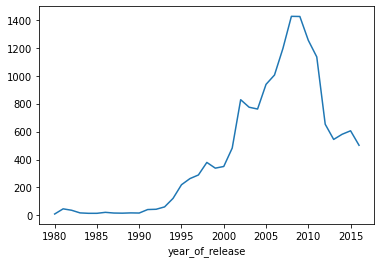

In [19]:
df.groupby('year_of_release')['name'].count().plot()

До ~2010 года выпуск игр рос, но после по какой-то причине произошел резкий спад.
<br><br>
Важны ли данные за все периоды? Нет, поскольку мы планируем кампанию на 2017-й год, для нас актуальны данные только за последние несколько лет.

<b>Как менялись продажи по платформам</b>

In [20]:
df['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

<AxesSubplot:xlabel='year_of_release'>

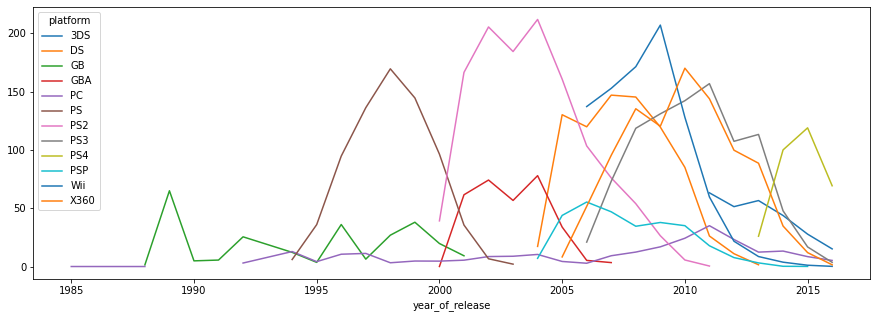

In [21]:
top_10 = df.groupby('platform').sum()['all_sales'].sort_values(ascending=False).index.values[:12]

top_platform = df[df.platform.isin(top_10)]
top_platform = top_platform.pivot_table(index='year_of_release', columns='platform', values='all_sales', aggfunc='sum')

top_platform.plot(figsize=(15, 5))

По графику видно, что почти все платформы изживали себя. Единственное исключение - PC, которое протягивается от начала до конца графика.
<br><br>
За какой характерный срок появляются новые и исчезают старые платформы? Около 12 лет

<b>Взятие данных за соответствующий актуальный период</b>

Для построения прогноза на 2017-й год возьмем данные за последние 3 года:

In [22]:
df_new = df.query('year_of_release > 2013')
df_new.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,ND,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,ND,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,ND,7.98


<b>Выбор нескольких потенциально прибыльных платформ</b>

<AxesSubplot:xlabel='year_of_release'>

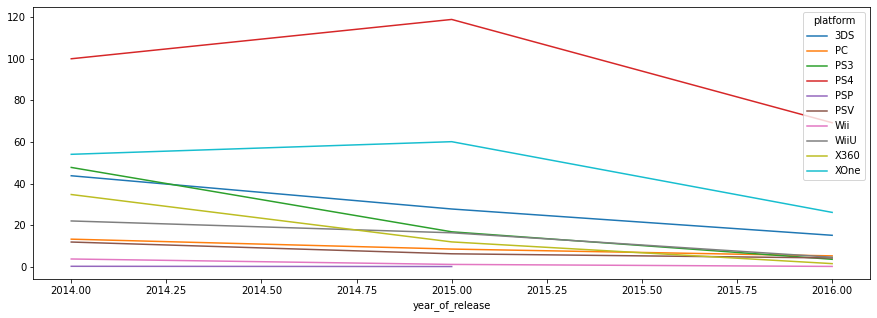

In [23]:
df_new.pivot_table(index='year_of_release', columns='platform', values='all_sales', aggfunc='sum').plot(figsize=(15, 5))

Лидирует по продажам PS4. Падают по продажам все платформы, судя по графику. Выберем несколько потенциально прибыльных платформ: PS4, XOne, 3DS, PC.

<b>Построение графика «ящик с усами» по глобальным продажам игр в разбивке по платформам</b>

<AxesSubplot:title={'center':'all_sales'}, xlabel='platform'>

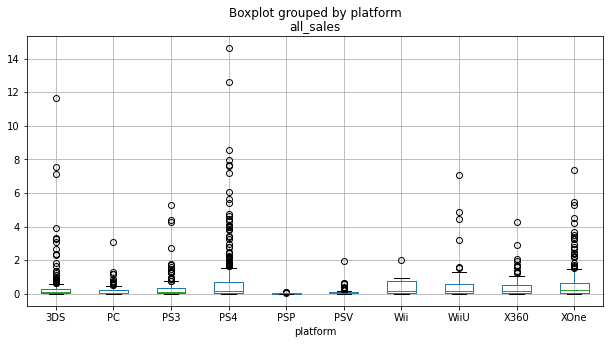

In [24]:
df_new.boxplot(by='platform', column='all_sales', figsize=(10, 5))

Лидером продаж являются PS4, WiiU и XOne. PSP является самой непопулярной платформой из рассматриваемых. PC же также не особо популярна, но самая стабильная платформа. Выбросы показывают, что у каждой из платформ есть игры-хиты, приносящие миллионы.  Маленький ящик с большим количеством выбросов говорит о том, что основные продаж происходят засчет этих выбросов. А например на платформе XOne большой "ящик", длинный ус и малое количество выбросов, что может говорить о том, что на XOne покупают большое количество разных по популярности игр.


(0.0, 2.0)

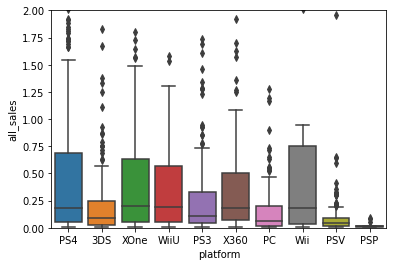

In [47]:
ax = sns.boxplot( data=df_new, x='platform', y='all_sales')
ax.set_ylim([0, 2])

Разницы между графиками по каждой платформе почти нет. Они демонстрируют похожие продажи. Средние же продажи очень сильно отличаются, поскольку почти в каждом графике присутсвуют выбросы (продажи очень популярных игр).

<b>Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построение диаграммы рассеяния и подсчет корреляции между отзывами и продажами</b> (возьмем платформу PC4)

-0.013070305002483143


0.32810508696636437

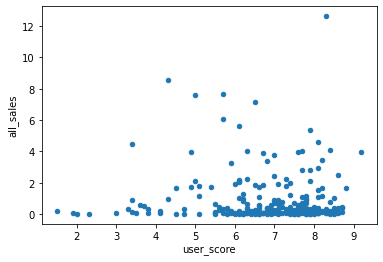

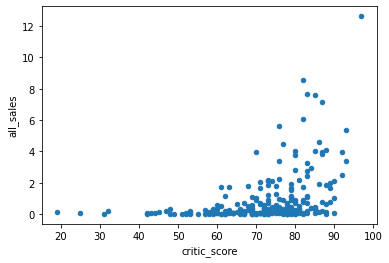

In [25]:
df_new.query('platform == "PS4"').plot(x='user_score', y='all_sales', kind='scatter')
df_new.query('platform == "PS4"').plot(x='critic_score', y='all_sales', kind='scatter')

print(df_new.corr()['user_score']['all_sales'])
df_new.corr()['critic_score']['all_sales']

Слабо отрицательная связь на графике с оценками пользователей и умеренно положительная связь на графике с оценками критиков.

<b>Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?</b>

<AxesSubplot:title={'center':'all_sales'}, xlabel='genre'>

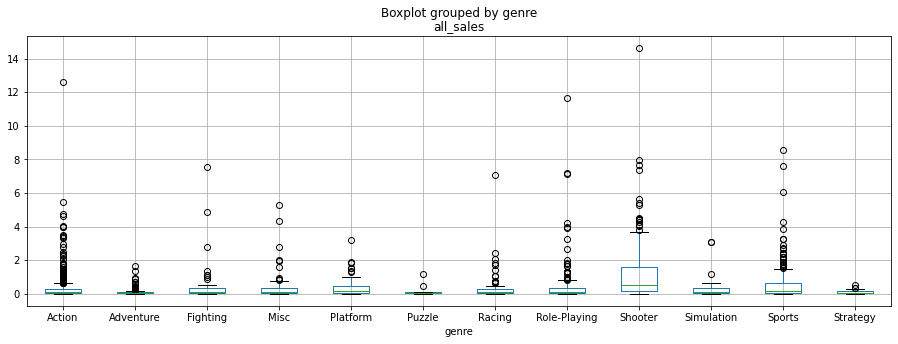

In [26]:
df_new.boxplot(by='genre', column='all_sales', figsize=(15,5))

In [27]:
df_new.groupby('genre').median()['all_sales'].sort_values(ascending=False)

genre
Shooter         0.515
Sports          0.180
Platform        0.140
Fighting        0.125
Role-Playing    0.110
Simulation      0.100
Action          0.090
Misc            0.090
Racing          0.090
Strategy        0.060
Puzzle          0.045
Adventure       0.030
Name: all_sales, dtype: float64

Самые высокие продажи у жанров Shooter, Sports и Platform. Самые низкие продажи у жанров Strategy, Puzzle, Adventure.

<h2>Портрет пользователя каждого региона</h2>

<b>Самые популярные платформы (топ-5)</b>

In [28]:
# NA
platforms_na = df_new.groupby('platform').na_sales.mean().sort_values(ascending=False)[:5]
print(platforms_na)

#EU
platforms_eu = df_new.groupby('platform').eu_sales.mean().sort_values(ascending=False)[:5]
print(platforms_eu)

#JP
platforms_jp = df_new.groupby('platform').jp_sales.mean().sort_values(ascending=False)[:5]
platforms_jp

platform
XOne    0.356447
WiiU    0.265205
PS4     0.262261
X360    0.254955
Wii     0.189091
Name: na_sales, dtype: float64
platform
PS4     0.345851
Wii     0.235455
XOne    0.202851
WiiU    0.180137
X360    0.139550
Name: eu_sales, dtype: float64


platform
3DS     0.208679
WiiU    0.100137
PS3     0.051233
PSV     0.049288
PS4     0.039947
Name: jp_sales, dtype: float64

<AxesSubplot:xlabel='platform'>

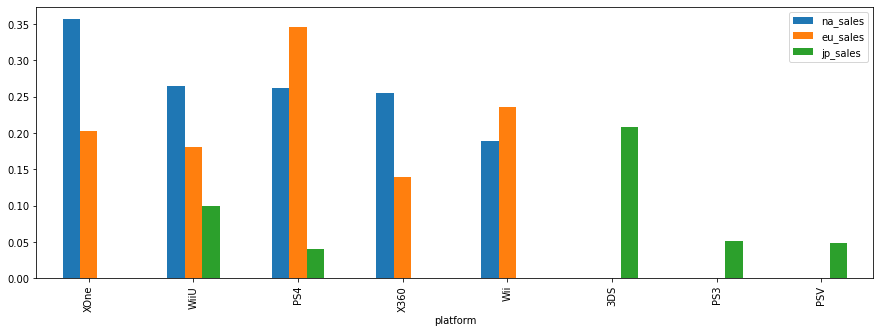

In [29]:
df_platform_region = pd.DataFrame(data=[platforms_na, platforms_eu, platforms_jp]).T

df_platform_region.plot(kind='bar',figsize=(15,5))

По диаграмме можно сказать, что рынки EU и NA схожи, а вот рынок JP сильно отличается. Самыми популярными платформами для NA - XOne, для EU - PS4, для JP - 3DC.

<b>Самые популярные жанры (топ-5)</b>

In [30]:
# NA
genre_na = df_new.groupby('genre').na_sales.mean().sort_values(ascending=False)[:5]
print(genre_na)

#EU
genre_eu = df_new.groupby('genre').eu_sales.mean().sort_values(ascending=False)[:5]
print(genre_eu)

#JP
genre_jp = df_new.groupby('genre').jp_sales.mean().sort_values(ascending=False)[:5]
genre_jp

genre
Shooter         0.617344
Sports          0.286522
Fighting        0.207167
Platform        0.178684
Role-Playing    0.151448
Name: na_sales, dtype: float64
genre
Shooter       0.511875
Sports        0.284037
Racing        0.204783
Platform      0.178947
Simulation    0.165909
Name: eu_sales, dtype: float64


genre
Role-Playing    0.140995
Fighting        0.106167
Platform        0.070789
Puzzle          0.066429
Simulation      0.052500
Name: jp_sales, dtype: float64

<AxesSubplot:xlabel='genre'>

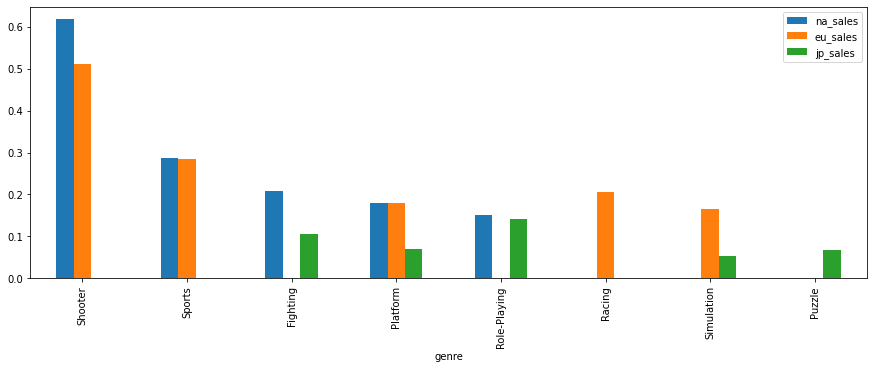

In [31]:
df_genre_region = pd.DataFrame(data=[genre_na, genre_eu, genre_jp]).T

df_genre_region.plot(kind='bar',figsize=(15,5))

По диаграмме мы видим, что особых совпадений среди регионов по жанрам нет. Cамыми популярными жанрами являются: для NA - Shooter, Sports, Fighting; для EU - Shooter, Sports, Racing; для JA - Role-Playing (остальные жанры в JP распределены примерно одинаково).

<b>Влияет ли рейтинг ESRB на продажи в отдельном регионе</b>

In [32]:
# NA
rating_na = df_new.groupby('rating').sum().na_sales
print(rating_na)

#EU
rating_eu = df_new.groupby('rating').sum().eu_sales
print(rating_eu)

#JP
rating_jp = df_new.groupby('rating').sum().jp_sales
rating_jp



rating
E       50.74
E10+    33.23
M       96.42
ND      64.72
T       38.95
Name: na_sales, dtype: float64
rating
E       58.06
E10+    26.16
M       93.44
ND      58.95
T       34.07
Name: eu_sales, dtype: float64


rating
E        8.94
E10+     4.46
M        8.01
ND      56.90
T       14.78
Name: jp_sales, dtype: float64

<AxesSubplot:xlabel='rating'>

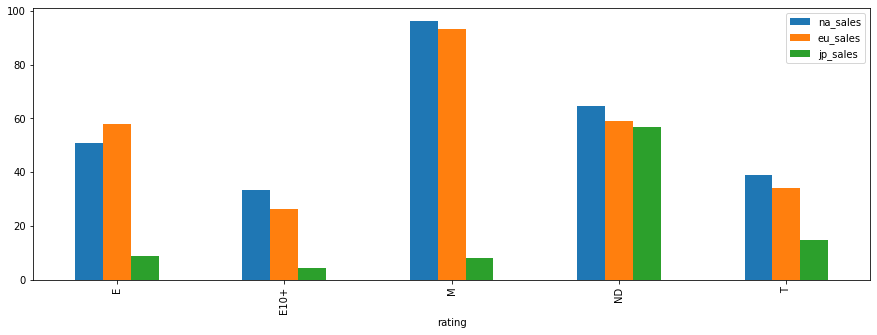

In [33]:
df_rating_region = pd.DataFrame(data=[rating_na, rating_eu, rating_jp]).T

df_rating_region.plot(kind='bar',figsize=(15,5))

Рейтинга M больше всего в регионах NA и JP, в Японии распределяются примерно одинаково (если не учитывать игры с неопределнным рейтингом). Также можем заметить, что достаточно большое количество игр с неопределенным рейтингом среди всех регионов.

<h2>Проверка гипотез</h2>

<b>Средние пользовательские рейтинги платформ Xbox One и PC одинаковые</b>

Cформулируем нулевую и альтернативную гипотезы по принципу "нулевая всегда со знаком равенства", а в альтернативной все то, что хотим проверить. <br> Для проверки гипотез применяем t-test (гипотеза о равенстве средних двух генеральных совокупностей), потому что нужно сравнить средние двух генеральных совокупностей между собой. <br>
H0 = Средние пользовательские рейтинги платформ Xbox One и PC одинаковые <br>
H1 = Средние пользовательские рейтинги платформ Xbox One и PC отличаются

In [34]:
alpha = .05
 
pl_XOne = df_new[df_new['platform'] == 'XOne']['user_score'].dropna()
pl_PC = df_new[df_new['platform'] == 'PC']['user_score'].dropna()

results = st.ttest_ind(pl_XOne, pl_PC)

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

0.10450507919348415
Не получилось отвергнуть нулевую гипотезу


<b>Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные</b>

Cформулируем нулевую и альтернативную гипотезы по принципу "нулевая всегда со знаком равенства", а в альтернативной все то, что хотим проверить. <br> Для проверки гипотез применяем t-test (гипотеза о равенстве средних двух генеральных совокупностей), потому что нужно сравнить средние двух генеральных совокупностей между собой. <br>
H0 = Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые <br>
H1 = Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

In [38]:
alpha = .05
 
pl_action = df_new[df_new['genre'] == 'Action']['user_score'].dropna()
pl_sports = df_new[df_new['genre'] == 'Sports']['user_score'].dropna()

results = st.ttest_ind(pl_action, pl_sports)

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

2.8711147985105864e-19
Отвергаем нулевую гипотезу


<h2>Общий вывод</h2>

<b>Шаг 1. Открытие файла с данными и изучение общей информации</b>
<br>
Данные были успешно загружены, никаких проблем не возникло. Дана предварительная оценка данных: в некоторых столбцах присутсвуют пропуски и столбцы неправильно названы.
<br><br>

<b>Шаг 2. Подготовка данных</b>
<br>
Переименовали названия столбцов в соответствии с правилами. Преобразовали данные в нужные типы. Обработали пропуски в некоторых столбцах. Добавили столбец с суммарными продажами во всех регионах.
<br><br>

<b>Шаг 3. Исследовательский анализ данных</b>
<br>
Данные не за все периоды важны для нашей цели. По продажам лидирует платформа PS4. Все платформы постепенно падают по продажам. Растущих платформ нет. PC - стабильная платформа. Потенциально прибыльные платформы - PS4, XOne, 3DS, PC. По графику "ящык с усами" можно сказать следующее: разницы между графиками по каждой платформе почти нет. Они демонстрируют похожие продажи. Средние же продажи очень сильно отличаются, поскольку почти в каждом графике присутсвуют выбросы (продажи очень популярных игр). Высокий рейтинг далеко не всегда означает большие продажи, а низкий рейтинг почти всегда обозначает низкий уровень продаж. Слабо отрицательная связь на графике с оценками пользователей и умеренно положительная связь на графике с оценками критиков. Самые высокие продажи у жанров Shooter, Sports и Platform. Самые низкие продажи у жанров Strategy, Puzzle, Adventure.
<br><br>

<b>Шаг 4. Портрет пользователя каждого региона</b>
<br>
NA: самая популрная платформа - XOne, самый популярный жанр - Shooter.
EU: самая популрная платформа - PS4, самый популярный жанр - Shooter.
JP: самая популрная платформа - 3DS, самый популярный жанр - Role-Playing.
<br><br>

<b>Шаг 5. Проверка гипотез</b>
<br>
В ходе проверки обе гипотезы потдвердились:
1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые <br>
2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные
<br><br>